In [1]:
import sys
%cd G:\My Drive\Software\nr\molgroups\new_examples
sys.path.append('..')
import molgroups as mol
import numpy as np
from importlib import reload
from bumps.cli import load_model, load_best
import matplotlib.pyplot as plt
%matplotlib inline

g:\My Drive\Software\nr\molgroups\new_examples


In [2]:
# Load in model file

model = load_model('ssBLM/ssBLM.py')
load_best(model, 'ssBLM/fit/ssBLM.par')
model.chisq_str() # recalculates model

'1.123(84)'

In [3]:
def plot_components(z, blm):
    dd, aArea, anSL = blm.fnWriteProfile(z)
    aArea = np.array(aArea)
    anSL = np.array(anSL)
    sel = aArea>0
    anSLD = anSL[sel] / (aArea[sel] * stepsize)

    fig, ax = plt.subplots(3, 1, figsize=(20,24))
    ax[0].plot(z[sel], aArea[sel])
    ax[1].plot(z[sel], anSLD)
    ax[2].plot(z[sel], anSL[sel])
    ax[0].set_ylabel('Area')
    ax[1].set_ylabel('nSLD')
    ax[2].set_ylabel('nSL')
    ax[0].set_xlabel('z')
    ax[1].set_xlabel('z')
    ax[2].set_xlabel('z')

    # plot individual components
    for key, val in blm.__dict__.items():       # cycle over all attributes of blm
        if isinstance(val, mol.nSLDObj):        # if it's ultimately an instance of nSLDObj, plot its profile, otherwise ignore it
            ddp, aArea, anSL = val.fnWriteProfile(z)
            aArea = np.array(aArea)
            anSL = np.array(anSL)
            sel = aArea>0
            anSLD = anSL[sel] / (aArea[sel] * stepsize)
            ax[0].plot(z[sel], aArea[sel], '-', label=val.name)
            ax[1].plot(z[sel], anSLD, '-', label=val.name)
            ax[2].plot(z[sel], anSL[sel])

    ax[0].legend(loc=0)
    ax[1].legend(loc=0)

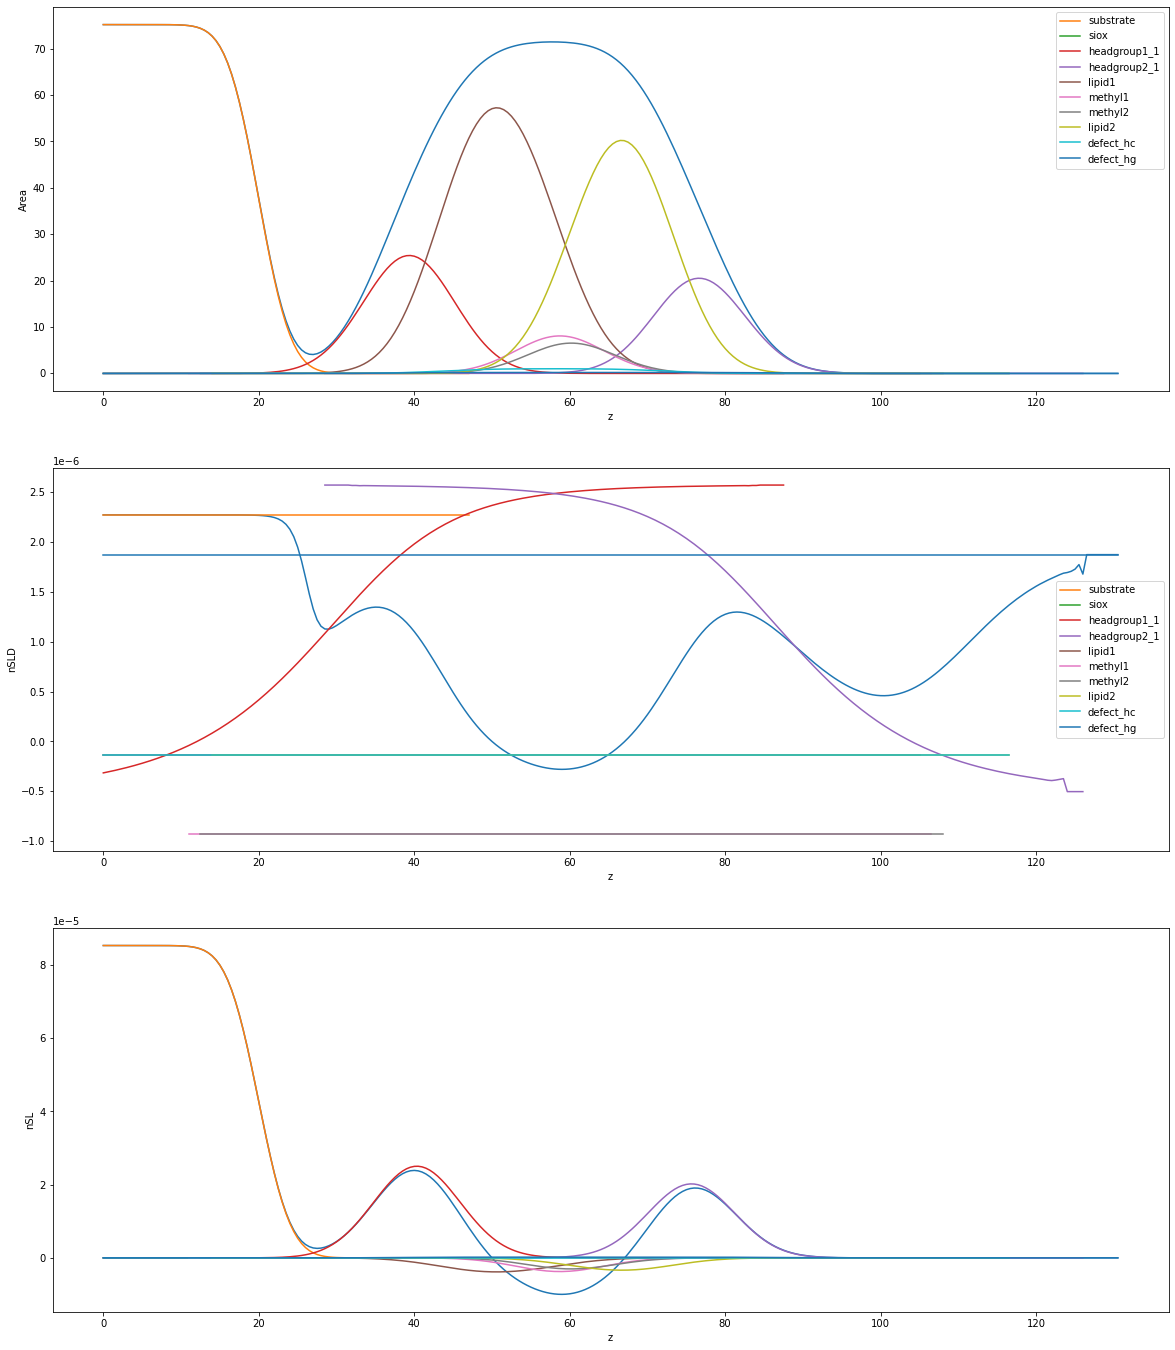

In [4]:
# alternate plotting routine

z = np.arange(model.dimension) * model.stepsize
stepsize = model.stepsize
blm = model.bilayers[0]

plot_components(z, blm)
# first plot the overall profile


# tBLM model

In [5]:
model = load_model('tBLM/tBLM.py')
load_best(model, 'tBLM/fit/tBLM.par')
model.chisq_str()

'1.11(10)'

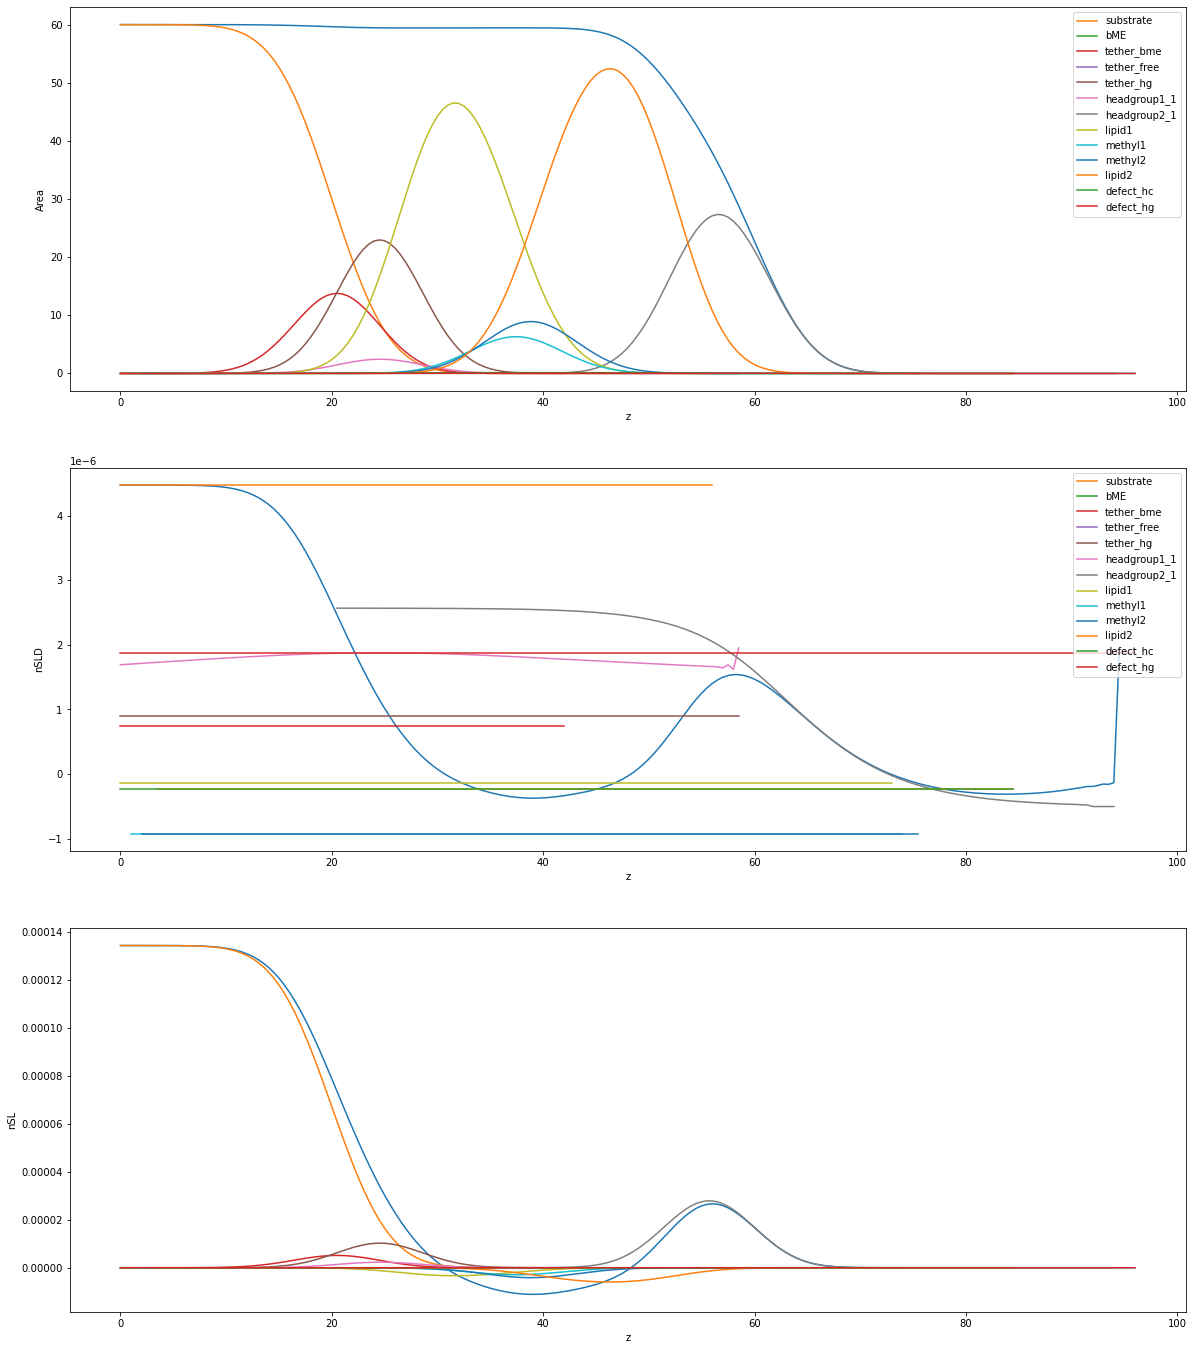

In [6]:
z = np.arange(model.dimension) * model.stepsize
stepsize = model.stepsize
blm = model.bilayers[0]

plot_components(z, model.bilayers[0])

In [7]:
from bumps.dream.state import load_state
state = load_state('tBLM/fit/tBLM')
state.mark_outliers() # ignore outlier chains
#state.show()  # Plot statistics

mts 0.10173664947550383 0.2505286286978324 0.0
lts 6.388916923078101 0.635099131459488 6.4106986364335645


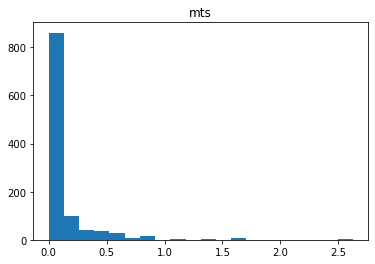

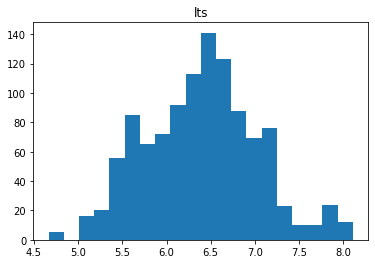

In [8]:
dw = state.draw(thin=5)

# calculate the actual mult_tether and l_tether distributions
mts = list()
lts = list()

for i, d in enumerate(dw.points):
    #if np.mod(i, 100)==0:
    #    print(i, flush=True)
    model.setp(d)
    model.chisq_str()
    mts.append(model.bilayers[0].mult_tether)
    lts.append(model.bilayers[0].l_tether)

plt.figure()
plt.hist(mts, bins=20)
plt.title('mts')

plt.figure()
plt.hist(lts, bins=20)
plt.title('lts')

print('mts', np.mean(mts), np.std(mts), np.median(mts))
print('lts', np.mean(lts), np.std(lts), np.median(lts))


In [9]:
from bumps.dream.stats import credible_interval

print(credible_interval(np.array(mts), [0, 0.68, 0.95]))
print(credible_interval(np.array(lts), [0, 0.68, 0.95]))

[[0.         0.        ]
 [0.         0.21330239]
 [0.         0.80211353]]
[[6.41069864 6.41069864]
 [5.66706858 6.98682554]
 [5.26208752 7.82819801]]
